# ECON 522 - Lab 0

Today we will discuss the following. (1) How to use the FRED API and get data from FRED. (2) Apply deterministic trends in Python and (3) Use various information criteria

In [2]:
pip install fredapi

Note: you may need to restart the kernel to use updated packages.


First, let us download monthly industrial production data from FRED directly. Doing so involves the use of the FRED API key. You can request for one by signing up for a free account at FRED. 

              INDPRO
2000-01-01   91.5380
2000-02-01   91.8239
2000-03-01   92.1504
2000-04-01   92.6989
2000-05-01   92.9499
...              ...
2025-08-01  101.5867
2025-09-01  101.7779
2025-10-01  101.5163
2025-11-01  101.9528
2025-12-01  102.3250

[312 rows x 1 columns]


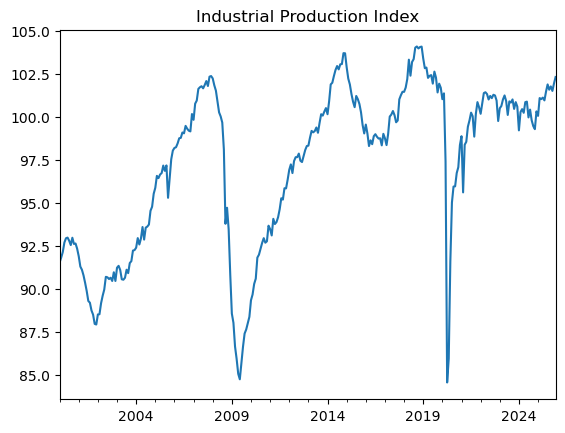

In [3]:
from fredapi import Fred
import pandas as pd

# Replace 'your_api_key' with your actual FRED API key
fred = Fred(api_key='e7d91fd4ac05e8ae87fa956d551f861f')

# Download monthly industrial production data from January 2000 to present
indpro = fred.get_series('INDPRO', observation_start='2000-01-01')

# Convert the series to a DataFrame

indpro_df = indpro.to_frame(name='INDPRO')
print(indpro_df)

# Graph the data
import matplotlib.pyplot as plt
indpro_df.plot(title='Industrial Production Index', legend=None)
plt.show()


Recall that we have a couple of types of trends. The most common ones are linear, quadratic, and exponential trends. A Linear Trend would loke something like this $$INDPRO_t = c + \beta t + u_t$$

In [4]:
# Estimate a linear trend for the industrial production index
from statsmodels.api import OLS
from statsmodels.tools import add_constant

# Add a constant term to the independent variable
t = range(len(indpro_df)) 
X = pd.DataFrame({'t': t}, index=indpro_df.index)
X = add_constant(X)  # Add a constant term for the intercept

# Fit a linear trend to the industrial production index
model = OLS(indpro_df, X)
results = model.fit()

# Print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 INDPRO   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     213.8
Date:                Fri, 23 Jan 2026   Prob (F-statistic):           3.49e-37
Time:                        01:28:48   Log-Likelihood:                -845.48
No. Observations:                 312   AIC:                             1695.
Df Residuals:                     310   BIC:                             1702.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.0259      0.412    223.338      0.0

Let us visualize the raw series and the linear trend

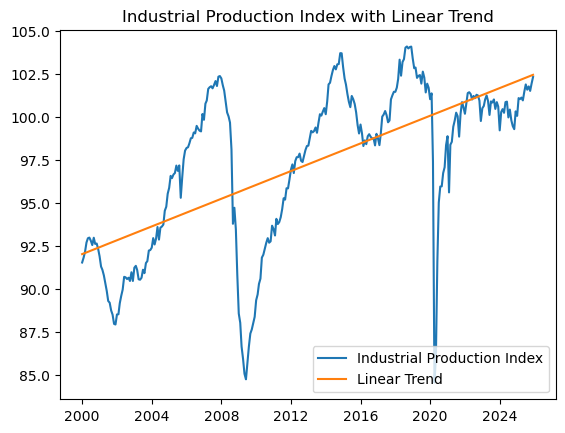

In [5]:
# Graph the data and the linear trend
plt.plot(indpro_df, label='Industrial Production Index')
plt.plot(results.fittedvalues, label='Linear Trend')
plt.legend()
plt.title('Industrial Production Index with Linear Trend')
plt.show()

Not so good, clearly! Let us visualize the residuals behind this.

Text(0.5, 1.0, 'Residuals of Linear Trend')

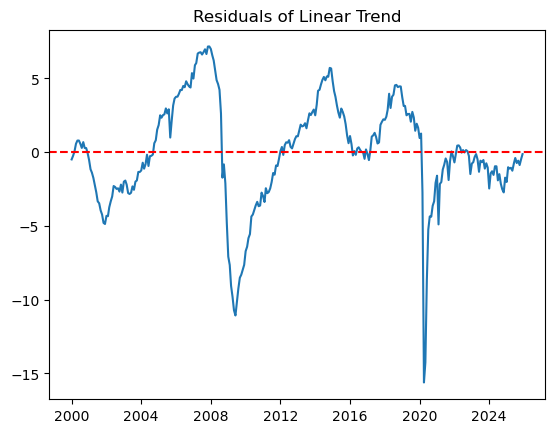

In [6]:
# Plot the residuals over time with a red line at zero
plt.plot(results.resid)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals of Linear Trend')

Clearly, it not that "random", there seems to be a clear persistence there. 

Let us now try a quadratic model and an exponential model. 

                            OLS Regression Results                            
Dep. Variable:                 INDPRO   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     118.7
Date:                Fri, 23 Jan 2026   Prob (F-statistic):           5.79e-39
Time:                        01:29:10   Log-Likelihood:                -838.40
No. Observations:                 312   AIC:                             1683.
Df Residuals:                     309   BIC:                             1694.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.3296      0.603    149.858      0.0

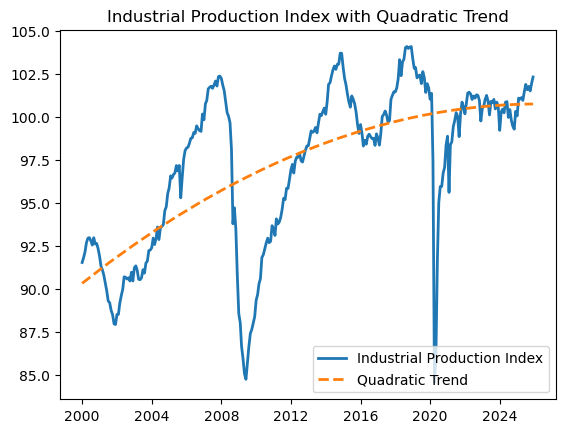

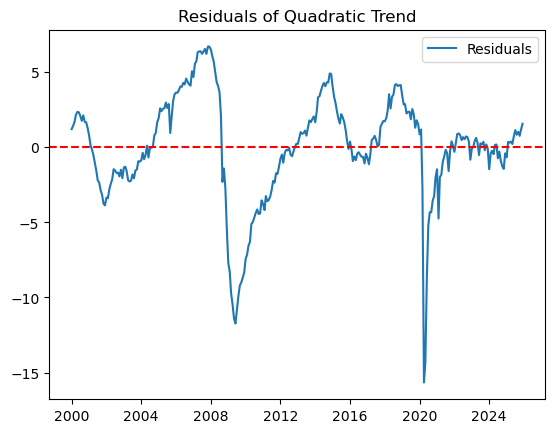

In [7]:
# Create independent variables with aligned index
t = range(len(indpro_df))  # Time variable
t_squared = [i**2 for i in t]  # Squared term

# Align indices by using indpro_df's index
X_quad = pd.DataFrame({'t': t, 't_squared': t_squared}, index=indpro_df.index)
X_quad = add_constant(X_quad)  # Add a constant term for the intercept

# Fit a quadratic trend model
model_quad = OLS(indpro_df['INDPRO'], X_quad)  # Dependent variable is the column 'INDPRO'
results_quad = model_quad.fit()

# Print the summary results
print(results_quad.summary())

# Plot the data and the quadratic trend
plt.figure()
plt.plot(indpro_df['INDPRO'], label='Industrial Production Index', linewidth=2)
plt.plot(results_quad.fittedvalues, label='Quadratic Trend', linestyle='--', linewidth=2)
plt.legend()
plt.title('Industrial Production Index with Quadratic Trend')
plt.show()

# Plot the residuals over time with a red line at zero
plt.figure()
plt.plot(results_quad.resid, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals of Quadratic Trend')
plt.legend()
plt.show()

Let's now try an exponential case

                            OLS Regression Results                            
Dep. Variable:                 INDPRO   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     208.7
Date:                Fri, 23 Jan 2026   Prob (F-statistic):           1.59e-36
Time:                        01:29:33   Log-Likelihood:                 575.00
No. Observations:                 312   AIC:                            -1146.
Df Residuals:                     310   BIC:                            -1139.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5217      0.004   1041.384      0.0

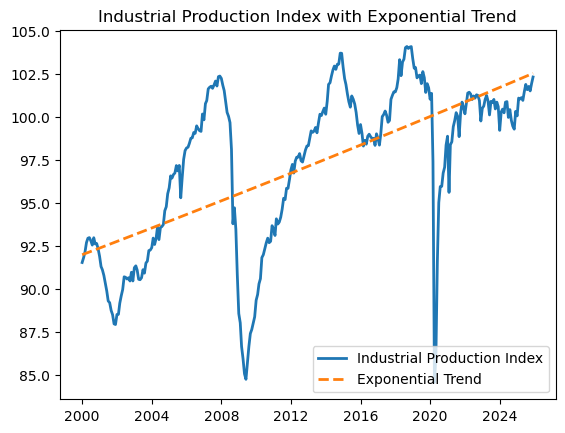

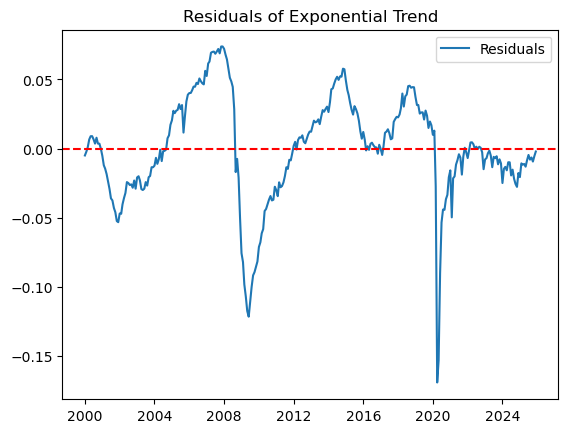

In [8]:
import numpy as np

# Take the natural logarithm of the industrial production index
indpro_log = np.log(indpro_df['INDPRO'])

# Fit a linear trend to the log-transformed data
model_exp = OLS(indpro_log, X)
results_exp = model_exp.fit()

# Print the summary results
print(results_exp.summary())

# Plot the data and the exponential trend
plt.figure()
plt.plot(indpro_df['INDPRO'], label='Industrial Production Index', linewidth=2)
plt.plot(np.exp(results_exp.fittedvalues), label='Exponential Trend', linestyle='--', linewidth=2)
plt.legend()
plt.title('Industrial Production Index with Exponential Trend')
plt.show()

# Plot the residuals over time with a red line at zero
plt.figure()
plt.plot(results_exp.resid, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals of Exponential Trend')
plt.legend()
plt.show()

It seems that with just deterministic trends alone, we can't get very far. Now let us try to include some autoregressive (AR) component

                            OLS Regression Results                            
Dep. Variable:                 INDPRO   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     2885.
Date:                Fri, 23 Jan 2026   Prob (F-statistic):          3.47e-200
Time:                        01:29:44   Log-Likelihood:                -460.35
No. Observations:                 311   AIC:                             926.7
Df Residuals:                     308   BIC:                             937.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.0504      1.535      2.639      

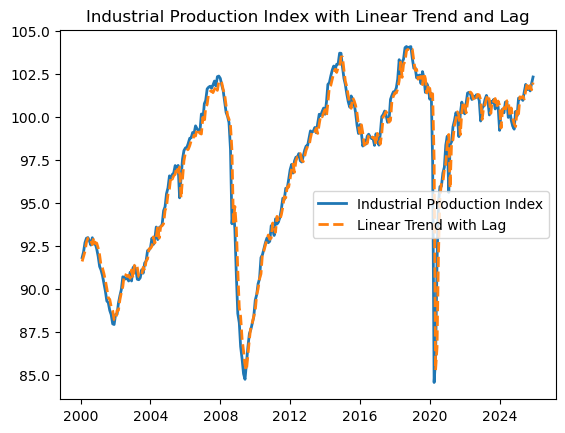

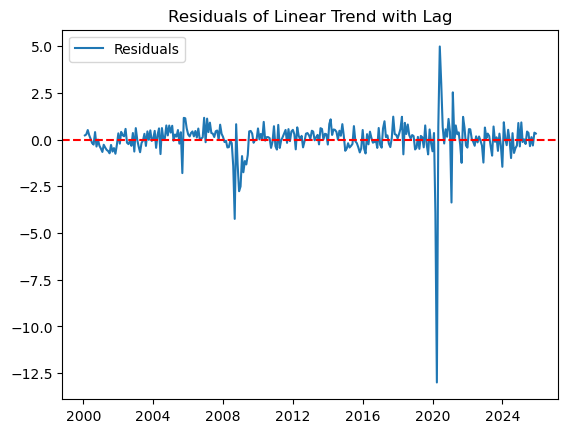

In [9]:
# Create the first lag of the industrial production index
indpro_df['INDPRO_LAG1'] = indpro_df['INDPRO'].shift(1)

# Drop the first row with NaN value due to lagging
indpro_df = indpro_df.dropna()

# Update the independent variables to include the lagged variable
X_with_lag = X.iloc[1:].copy()  # Exclude the first row to match the lagged data
X_with_lag['INDPRO_LAG1'] = indpro_df['INDPRO_LAG1']

# Fit the linear trend model with the lagged variable
model_with_lag = OLS(indpro_df['INDPRO'], X_with_lag)
results_with_lag = model_with_lag.fit()

# Print the summary results
print(results_with_lag.summary())

# Plot the data and the fitted values
plt.figure()
plt.plot(indpro_df['INDPRO'], label='Industrial Production Index', linewidth=2)
plt.plot(results_with_lag.fittedvalues, label='Linear Trend with Lag', linestyle='--', linewidth=2)
plt.legend()
plt.title('Industrial Production Index with Linear Trend and Lag')
plt.show()

# Plot the residuals over time with a red line at zero
plt.figure()
plt.plot(results_with_lag.resid, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals of Linear Trend with Lag')
plt.legend()
plt.show()

Much better! Clearly adding the extra AR term helps! 

Next, we need to start comparing models. We did 4 models. M1 - Linear Trend, M2 - Quadratic Trend, M3 - Exponential Trend, and M4 - Linear Trend with AR. We will use information criteria to compare them.

In [10]:
# Compare models using AIC and BIC
models = {
    'Linear Trend': results,
    'Quadratic Trend': results_quad,
    'Exponential Trend': results_exp,
    'Linear Trend with AR': results_with_lag
}

# Create a list to store the AIC and BIC values
comparison_data = []

for model_name, model_results in models.items():
    comparison_data.append({
        'Model': model_name,
        'AIC': model_results.aic,
        'BIC': model_results.bic
    })

# Convert the list of dictionaries to a DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Display the comparison DataFrame
print(comparison_df)

                  Model          AIC          BIC
0          Linear Trend  1694.954786  1702.440793
1       Quadratic Trend  1682.793328  1694.022338
2     Exponential Trend -1145.995665 -1138.509658
3  Linear Trend with AR   926.695710   937.915089


Be careful with the exponential since its logged, use the smallest in absolute value. Clearly, the obvious result is seen, which is the linear trend model with AR is chosen to be the best

Good! Now, let us make a function that allows us to automate the workflow

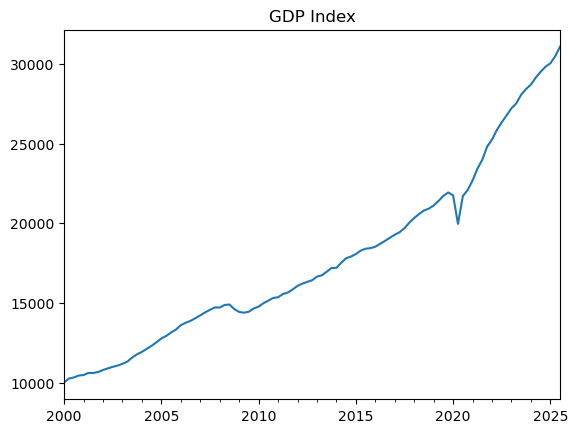

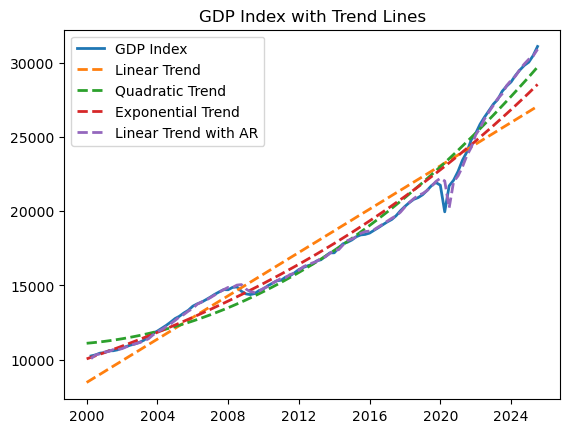

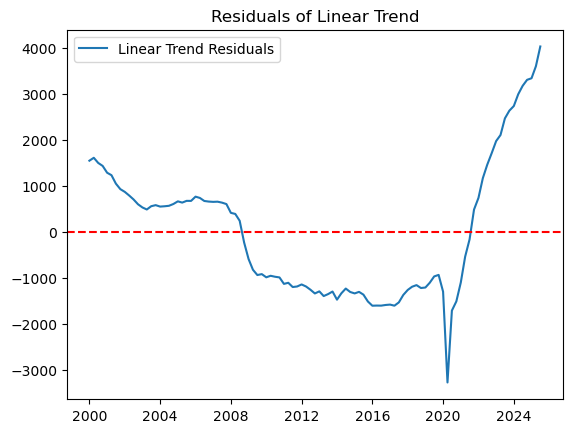

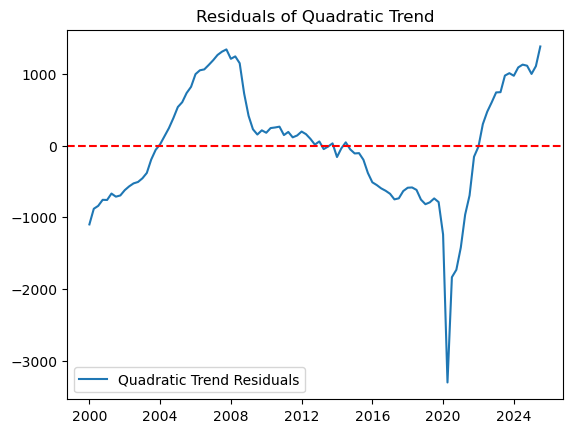

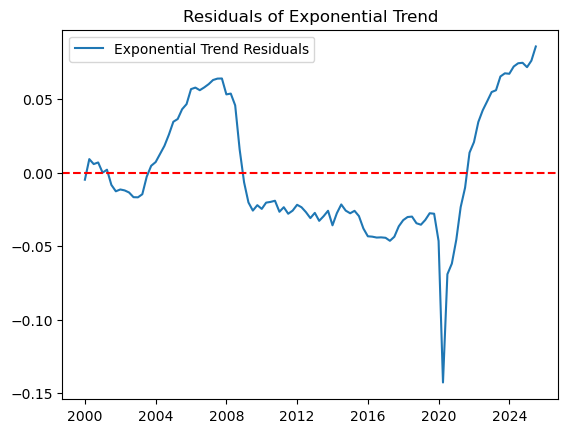

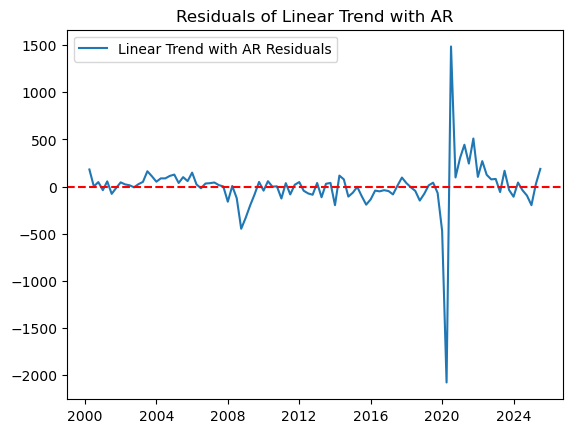

                  Model          AIC          BIC
0          Linear Trend  1797.717368  1802.986826
1       Quadratic Trend  1678.740715  1686.644902
2     Exponential Trend  -356.273035  -351.003577
3  Linear Trend with AR  1450.601643  1458.476562


In [12]:
from fredapi import Fred
import pandas as pd
from statsmodels.api import OLS
from statsmodels.tools import add_constant
import numpy as np

import matplotlib.pyplot as plt

def analyze_fred_data(series_id):
    # Replace 'your_api_key' with your actual FRED API key
    fred = Fred(api_key='fe3741e38a5245c3cc826f2d6ae3e1f2')

    # Download data from FRED
    data = fred.get_series(series_id, observation_start='2000-01-01')
    data_df = data.to_frame(name=series_id)
    
    # Plot the data
    data_df.plot(title=f'{series_id} Index', legend=None)
    plt.show()

    # Prepare data for modeling
    t = range(len(data_df))
    X = pd.DataFrame({'t': t}, index=data_df.index)
    X = add_constant(X)

    # Linear Trend Model
    model_linear = OLS(data_df, X)
    results_linear = model_linear.fit()

    # Quadratic Trend Model
    t_squared = [i**2 for i in t]
    X_quad = pd.DataFrame({'t': t, 't_squared': t_squared}, index=data_df.index)
    X_quad = add_constant(X_quad)
    model_quad = OLS(data_df[series_id], X_quad)
    results_quad = model_quad.fit()

    # Exponential Trend Model
    data_log = np.log(data_df[series_id])
    model_exp = OLS(data_log, X)
    results_exp = model_exp.fit()

    # Linear Trend with AR Model
    data_df['LAG1'] = data_df[series_id].shift(1)
    data_df = data_df.dropna()
    X_with_lag = X.iloc[1:].copy()
    X_with_lag['LAG1'] = data_df['LAG1']
    model_with_lag = OLS(data_df[series_id], X_with_lag)
    results_with_lag = model_with_lag.fit()

    # Plot the data with trend lines
    plt.figure()
    plt.plot(data_df[series_id], label=f'{series_id} Index', linewidth=2)
    plt.plot(results_linear.fittedvalues, label='Linear Trend', linestyle='--', linewidth=2)
    plt.plot(results_quad.fittedvalues, label='Quadratic Trend', linestyle='--', linewidth=2)
    plt.plot(np.exp(results_exp.fittedvalues), label='Exponential Trend', linestyle='--', linewidth=2)
    plt.plot(results_with_lag.fittedvalues, label='Linear Trend with AR', linestyle='--', linewidth=2)
    plt.legend()
    plt.title(f'{series_id} Index with Trend Lines')
    plt.show()

    # Plot the residuals
    plt.figure()
    plt.plot(results_linear.resid, label='Linear Trend Residuals')
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residuals of Linear Trend')
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(results_quad.resid, label='Quadratic Trend Residuals')
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residuals of Quadratic Trend')
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(results_exp.resid, label='Exponential Trend Residuals')
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residuals of Exponential Trend')
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(results_with_lag.resid, label='Linear Trend with AR Residuals')
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residuals of Linear Trend with AR')
    plt.legend()
    plt.show()

    # Compare models using AIC and BIC
    models = {
        'Linear Trend': results_linear,
        'Quadratic Trend': results_quad,
        'Exponential Trend': results_exp,
        'Linear Trend with AR': results_with_lag
    }

    comparison_data = []
    for model_name, model_results in models.items():
        comparison_data.append({
            'Model': model_name,
            'AIC': model_results.aic,
            'BIC': model_results.bic
        })

    comparison_df = pd.DataFrame(comparison_data)
    print(comparison_df)

# Example usage
analyze_fred_data('GDP')